In [2]:
import os
os.system('pip install pandas')
os.system('pip install numpy')
os.system('pip install pydotplus')
os.system('pip install io')
os.system('pip install pydotplus')
os.system('pip install sklearn')
os.system('pip install matplotlib')
os.system('pip install seaborn')
os.system('pip install scipy')
os.system('pip install xgboost')



import pandas as pd
import numpy as np
import pydotplus 
import io
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import misc
import xgboost as xgb
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
#from sklearn.model_selection import CridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix




%matplotlib inline


url = 'https://raw.githubusercontent.com/firasm/PIMS-BCFSA/master/New_Sample_Clean_latest.csv'
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,10)
import pandas as pd
url = "https://raw.githubusercontent.com/neha0812/PIMS-BCFSA/master/New_Sample_Clean_latest.csv"
df = pd.read_csv(url, error_bad_lines=False)
df = df.dropna()
df=df.drop(['Unnamed: 0'],axis=1)
df = df.replace(',','', regex=True)









#url ='https://raw.githubusercontent.com/shughestr/PIMS_2020_Real_Estate_data/master/sample_clean.csv'
  
#df = pd.read_csv(url, error_bad_lines=False)
#df=df.dropna()
# in this step, we removed 2 columns 
for col in df.columns:
    if len(df[col].unique())==1:
        df.drop(col,inplace=True,axis=1)

df.columns

Index(['ADDRESS', 'ASSESSED_VALUE', 'COMM_CODE', 'COMM_NAME', 'LATITUDE',
       'LONGITUDE', 'ROLL_NUMBER', 'Year', 'location', 'fsa', 'pct_change',
       'YEAR_OF_CONSTRUCTION', 'saf1', 'saf2', 'saf3', 'saf4', 'saf5', 'saf6',
       'saf7', 'saf8', 'mr5y', 'Inflation', 'pop1', 'pop2', 'pop3', 'pop4',
       'pop5', 'pop6', 'lan1', 'lan2', 'inc1', 'inc2', 'inc3', 'inc4', 'own1',
       'own2', 'own3', 'own4', 'lab1', 'lab2', 'lab3', 'vacancy_rate',
       'walk_score_comm', 'transit_score_comm', 'bike_score_comm',
       'comm_polulation'],
      dtype='object')

In [3]:
df['pct_change_bin']=pd.cut(df['pct_change'], bins=np.array([-0.12,-0.06, 0,0.06,0.12]),labels=range(0,4))
df=df.dropna()

In [4]:
from itertools import product

def check_cardinality(df):

    combinations_lst = list(product(df.columns, df.columns))
    relations = ['one_to_one', 'one_to_many', 'many_to_one']

    output = []
    for col1, col2 in combinations_lst:
        for relation in relations:
            try:
                pd.merge(df[[col1]], df[[col2]], left_on=col1, right_on=col2, validate=relation)
                output.append([col1, col2, relation])
            except:
                continue

    return output

In [5]:
def get_relation(df, col1, col2):        
    first_max = df[[col1, col2]].groupby(col1).count().max()[0]
    second_max = df[[col1, col2]].groupby(col2).count().max()[0]
    if first_max==1:
        if second_max==1:
            return 'one-to-one'
        else:
            return 'one-to-many'
    else:
        if second_max==1:
            return 'many-to-one'
        else:
            return 'many-to-many'

from itertools import product
for col_i, col_j in product(df.columns, df.columns):
    if col_i == col_j:
        continue
    print(col_i, col_j, get_relation(df, col_i, col_j))

ADDRESS ASSESSED_VALUE many-to-many
ADDRESS COMM_CODE many-to-many
ADDRESS COMM_NAME many-to-many
ADDRESS LATITUDE many-to-many
ADDRESS LONGITUDE many-to-many
ADDRESS ROLL_NUMBER many-to-many
ADDRESS Year many-to-many
ADDRESS location many-to-many
ADDRESS fsa many-to-many
ADDRESS pct_change many-to-many
ADDRESS YEAR_OF_CONSTRUCTION many-to-many
ADDRESS saf1 many-to-many
ADDRESS saf2 many-to-many
ADDRESS saf3 many-to-many
ADDRESS saf4 many-to-many
ADDRESS saf5 many-to-many
ADDRESS saf6 many-to-many
ADDRESS saf7 many-to-many
ADDRESS saf8 many-to-many
ADDRESS mr5y many-to-many
ADDRESS Inflation many-to-many
ADDRESS pop1 many-to-many
ADDRESS pop2 many-to-many
ADDRESS pop3 many-to-many
ADDRESS pop4 many-to-many
ADDRESS pop5 many-to-many
ADDRESS pop6 many-to-many
ADDRESS lan1 many-to-many
ADDRESS lan2 many-to-many
ADDRESS inc1 many-to-many
ADDRESS inc2 many-to-many
ADDRESS inc3 many-to-many
ADDRESS inc4 many-to-many
ADDRESS own1 many-to-many
ADDRESS own2 many-to-many
ADDRESS own3 many-to-man

LONGITUDE comm_polulation many-to-many
LONGITUDE pct_change_bin many-to-many
ROLL_NUMBER ADDRESS many-to-many
ROLL_NUMBER ASSESSED_VALUE many-to-many
ROLL_NUMBER COMM_CODE many-to-many
ROLL_NUMBER COMM_NAME many-to-many
ROLL_NUMBER LATITUDE many-to-many
ROLL_NUMBER LONGITUDE many-to-many
ROLL_NUMBER Year many-to-many
ROLL_NUMBER location many-to-many
ROLL_NUMBER fsa many-to-many
ROLL_NUMBER pct_change many-to-many
ROLL_NUMBER YEAR_OF_CONSTRUCTION many-to-many
ROLL_NUMBER saf1 many-to-many
ROLL_NUMBER saf2 many-to-many
ROLL_NUMBER saf3 many-to-many
ROLL_NUMBER saf4 many-to-many
ROLL_NUMBER saf5 many-to-many
ROLL_NUMBER saf6 many-to-many
ROLL_NUMBER saf7 many-to-many
ROLL_NUMBER saf8 many-to-many
ROLL_NUMBER mr5y many-to-many
ROLL_NUMBER Inflation many-to-many
ROLL_NUMBER pop1 many-to-many
ROLL_NUMBER pop2 many-to-many
ROLL_NUMBER pop3 many-to-many
ROLL_NUMBER pop4 many-to-many
ROLL_NUMBER pop5 many-to-many
ROLL_NUMBER pop6 many-to-many
ROLL_NUMBER lan1 many-to-many
ROLL_NUMBER lan2 many

saf1 LONGITUDE many-to-many
saf1 ROLL_NUMBER many-to-many
saf1 Year many-to-many
saf1 location many-to-many
saf1 fsa many-to-many
saf1 pct_change many-to-many
saf1 YEAR_OF_CONSTRUCTION many-to-many
saf1 saf2 many-to-many
saf1 saf3 many-to-many
saf1 saf4 many-to-many
saf1 saf5 many-to-many
saf1 saf6 many-to-many
saf1 saf7 many-to-many
saf1 saf8 many-to-many
saf1 mr5y many-to-many
saf1 Inflation many-to-many
saf1 pop1 many-to-many
saf1 pop2 many-to-many
saf1 pop3 many-to-many
saf1 pop4 many-to-many
saf1 pop5 many-to-many
saf1 pop6 many-to-many
saf1 lan1 many-to-many
saf1 lan2 many-to-many
saf1 inc1 many-to-many
saf1 inc2 many-to-many
saf1 inc3 many-to-many
saf1 inc4 many-to-many
saf1 own1 many-to-many
saf1 own2 many-to-many
saf1 own3 many-to-many
saf1 own4 many-to-many
saf1 lab1 many-to-many
saf1 lab2 many-to-many
saf1 lab3 many-to-many
saf1 vacancy_rate many-to-many
saf1 walk_score_comm many-to-many
saf1 transit_score_comm many-to-many
saf1 bike_score_comm many-to-many
saf1 comm_polulat

saf8 ADDRESS many-to-many
saf8 ASSESSED_VALUE many-to-many
saf8 COMM_CODE many-to-many
saf8 COMM_NAME many-to-many
saf8 LATITUDE many-to-many
saf8 LONGITUDE many-to-many
saf8 ROLL_NUMBER many-to-many
saf8 Year many-to-many
saf8 location many-to-many
saf8 fsa many-to-many
saf8 pct_change many-to-many
saf8 YEAR_OF_CONSTRUCTION many-to-many
saf8 saf1 many-to-many
saf8 saf2 many-to-many
saf8 saf3 many-to-many
saf8 saf4 many-to-many
saf8 saf5 many-to-many
saf8 saf6 many-to-many
saf8 saf7 many-to-many
saf8 mr5y many-to-many
saf8 Inflation many-to-many
saf8 pop1 many-to-many
saf8 pop2 many-to-many
saf8 pop3 many-to-many
saf8 pop4 many-to-many
saf8 pop5 many-to-many
saf8 pop6 many-to-many
saf8 lan1 many-to-many
saf8 lan2 many-to-many
saf8 inc1 many-to-many
saf8 inc2 many-to-many
saf8 inc3 many-to-many
saf8 inc4 many-to-many
saf8 own1 many-to-many
saf8 own2 many-to-many
saf8 own3 many-to-many
saf8 own4 many-to-many
saf8 lab1 many-to-many
saf8 lab2 many-to-many
saf8 lab3 many-to-many
saf8 vacanc

pop5 COMM_NAME many-to-many
pop5 LATITUDE many-to-many
pop5 LONGITUDE many-to-many
pop5 ROLL_NUMBER many-to-many
pop5 Year many-to-many
pop5 location many-to-many
pop5 fsa many-to-many
pop5 pct_change many-to-many
pop5 YEAR_OF_CONSTRUCTION many-to-many
pop5 saf1 many-to-many
pop5 saf2 many-to-many
pop5 saf3 many-to-many
pop5 saf4 many-to-many
pop5 saf5 many-to-many
pop5 saf6 many-to-many
pop5 saf7 many-to-many
pop5 saf8 many-to-many
pop5 mr5y many-to-many
pop5 Inflation many-to-many
pop5 pop1 many-to-many
pop5 pop2 many-to-many
pop5 pop3 many-to-many
pop5 pop4 many-to-many
pop5 pop6 many-to-many
pop5 lan1 many-to-many
pop5 lan2 many-to-many
pop5 inc1 many-to-many
pop5 inc2 many-to-many
pop5 inc3 many-to-many
pop5 inc4 many-to-many
pop5 own1 many-to-many
pop5 own2 many-to-many
pop5 own3 many-to-many
pop5 own4 many-to-many
pop5 lab1 many-to-many
pop5 lab2 many-to-many
pop5 lab3 many-to-many
pop5 vacancy_rate many-to-many
pop5 walk_score_comm many-to-many
pop5 transit_score_comm many-to-m

inc4 saf2 many-to-many
inc4 saf3 many-to-many
inc4 saf4 many-to-many
inc4 saf5 many-to-many
inc4 saf6 many-to-many
inc4 saf7 many-to-many
inc4 saf8 many-to-many
inc4 mr5y many-to-many
inc4 Inflation many-to-many
inc4 pop1 many-to-many
inc4 pop2 many-to-many
inc4 pop3 many-to-many
inc4 pop4 many-to-many
inc4 pop5 many-to-many
inc4 pop6 many-to-many
inc4 lan1 many-to-many
inc4 lan2 many-to-many
inc4 inc1 many-to-many
inc4 inc2 many-to-many
inc4 inc3 many-to-many
inc4 own1 many-to-many
inc4 own2 many-to-many
inc4 own3 many-to-many
inc4 own4 many-to-many
inc4 lab1 many-to-many
inc4 lab2 many-to-many
inc4 lab3 many-to-many
inc4 vacancy_rate many-to-many
inc4 walk_score_comm many-to-many
inc4 transit_score_comm many-to-many
inc4 bike_score_comm many-to-many
inc4 comm_polulation many-to-many
inc4 pct_change_bin many-to-many
own1 ADDRESS many-to-many
own1 ASSESSED_VALUE many-to-many
own1 COMM_CODE many-to-many
own1 COMM_NAME many-to-many
own1 LATITUDE many-to-many
own1 LONGITUDE many-to-many
o

lab3 pop3 many-to-many
lab3 pop4 many-to-many
lab3 pop5 many-to-many
lab3 pop6 many-to-many
lab3 lan1 many-to-many
lab3 lan2 many-to-many
lab3 inc1 many-to-many
lab3 inc2 many-to-many
lab3 inc3 many-to-many
lab3 inc4 many-to-many
lab3 own1 many-to-many
lab3 own2 many-to-many
lab3 own3 many-to-many
lab3 own4 many-to-many
lab3 lab1 many-to-many
lab3 lab2 many-to-many
lab3 vacancy_rate many-to-many
lab3 walk_score_comm many-to-many
lab3 transit_score_comm many-to-many
lab3 bike_score_comm many-to-many
lab3 comm_polulation many-to-many
lab3 pct_change_bin many-to-many
vacancy_rate ADDRESS many-to-many
vacancy_rate ASSESSED_VALUE many-to-many
vacancy_rate COMM_CODE many-to-many
vacancy_rate COMM_NAME many-to-many
vacancy_rate LATITUDE many-to-many
vacancy_rate LONGITUDE many-to-many
vacancy_rate ROLL_NUMBER many-to-many
vacancy_rate Year many-to-many
vacancy_rate location many-to-many
vacancy_rate fsa many-to-many
vacancy_rate pct_change many-to-many
vacancy_rate YEAR_OF_CONSTRUCTION many-t

comm_polulation lan1 many-to-many
comm_polulation lan2 many-to-many
comm_polulation inc1 many-to-many
comm_polulation inc2 many-to-many
comm_polulation inc3 many-to-many
comm_polulation inc4 many-to-many
comm_polulation own1 many-to-many
comm_polulation own2 many-to-many
comm_polulation own3 many-to-many
comm_polulation own4 many-to-many
comm_polulation lab1 many-to-many
comm_polulation lab2 many-to-many
comm_polulation lab3 many-to-many
comm_polulation vacancy_rate many-to-many
comm_polulation walk_score_comm many-to-many
comm_polulation transit_score_comm many-to-many
comm_polulation bike_score_comm many-to-many
comm_polulation pct_change_bin many-to-many
pct_change_bin ADDRESS many-to-many
pct_change_bin ASSESSED_VALUE many-to-many
pct_change_bin COMM_CODE many-to-many
pct_change_bin COMM_NAME many-to-many
pct_change_bin LATITUDE many-to-many
pct_change_bin LONGITUDE many-to-many
pct_change_bin ROLL_NUMBER many-to-many
pct_change_bin Year many-to-many
pct_change_bin location many-to

In [6]:

df_num = df.drop(['ADDRESS','COMM_CODE','COMM_NAME','location','fsa','comm_polulation'],axis=1)
df_num.columns
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14548 entries, 0 to 15999
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ASSESSED_VALUE        14548 non-null  float64 
 1   LATITUDE              14548 non-null  float64 
 2   LONGITUDE             14548 non-null  float64 
 3   ROLL_NUMBER           14548 non-null  int64   
 4   Year                  14548 non-null  int64   
 5   pct_change            14548 non-null  float64 
 6   YEAR_OF_CONSTRUCTION  14548 non-null  float64 
 7   saf1                  14548 non-null  float64 
 8   saf2                  14548 non-null  float64 
 9   saf3                  14548 non-null  float64 
 10  saf4                  14548 non-null  float64 
 11  saf5                  14548 non-null  float64 
 12  saf6                  14548 non-null  float64 
 13  saf7                  14548 non-null  float64 
 14  saf8                  14548 non-null  float64 
 15  mr

In [7]:
from sklearn import preprocessing
x=df_num.drop(['ASSESSED_VALUE','pct_change','Year','ROLL_NUMBER','pct_change_bin'],axis=1).values
#min_max_scaler=preprocessing.MinMaxScaler()
#x_scaled=min_max_scaler.fit_transform(x)


standard_scaler=preprocessing.StandardScaler()
x_scaled=standard_scaler.fit_transform(x)


df_scaled=pd.DataFrame(x_scaled,columns=df_num.drop(['ASSESSED_VALUE','pct_change_bin','pct_change','Year','ROLL_NUMBER'],axis=1).columns)
#df_scaled['ASSESSED_VALUE']=df_num['ASSESSED_VALUE']

df_scaled[['ASSESSED_VALUE','pct_change','pct_change_bin']]=df_num[['ASSESSED_VALUE','pct_change','pct_change_bin']]

df_scaled=df_scaled.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14548 entries, 0 to 15999
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ADDRESS               14548 non-null  object  
 1   ASSESSED_VALUE        14548 non-null  float64 
 2   COMM_CODE             14548 non-null  object  
 3   COMM_NAME             14548 non-null  object  
 4   LATITUDE              14548 non-null  float64 
 5   LONGITUDE             14548 non-null  float64 
 6   ROLL_NUMBER           14548 non-null  int64   
 7   Year                  14548 non-null  int64   
 8   location              14548 non-null  object  
 9   fsa                   14548 non-null  object  
 10  pct_change            14548 non-null  float64 
 11  YEAR_OF_CONSTRUCTION  14548 non-null  float64 
 12  saf1                  14548 non-null  float64 
 13  saf2                  14548 non-null  float64 
 14  saf3                  14548 non-null  float64 
 15  sa

In [9]:
df_scaled1=df_num.drop(['Year','ROLL_NUMBER'],axis=1)

In [10]:
df_scaled1['Age']=2020-df_scaled1['YEAR_OF_CONSTRUCTION']
df_scaled=df_scaled1.drop(['YEAR_OF_CONSTRUCTION'],axis=1)

In [11]:
x_train, x_test, y_train, y_test=train_test_split(df_scaled.drop(['ASSESSED_VALUE','pct_change'],axis=1),df_scaled['pct_change'],test_size=0.2,random_state=0)

In [12]:
df_scaled1.info()
#x_train['pct_change_bin']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14548 entries, 0 to 15999
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ASSESSED_VALUE        14548 non-null  float64 
 1   LATITUDE              14548 non-null  float64 
 2   LONGITUDE             14548 non-null  float64 
 3   pct_change            14548 non-null  float64 
 4   YEAR_OF_CONSTRUCTION  14548 non-null  float64 
 5   saf1                  14548 non-null  float64 
 6   saf2                  14548 non-null  float64 
 7   saf3                  14548 non-null  float64 
 8   saf4                  14548 non-null  float64 
 9   saf5                  14548 non-null  float64 
 10  saf6                  14548 non-null  float64 
 11  saf7                  14548 non-null  float64 
 12  saf8                  14548 non-null  float64 
 13  mr5y                  14548 non-null  float64 
 14  Inflation             14548 non-null  float64 
 15  po

In [13]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2910 entries, 11228 to 1254
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   LATITUDE            2910 non-null   float64 
 1   LONGITUDE           2910 non-null   float64 
 2   saf1                2910 non-null   float64 
 3   saf2                2910 non-null   float64 
 4   saf3                2910 non-null   float64 
 5   saf4                2910 non-null   float64 
 6   saf5                2910 non-null   float64 
 7   saf6                2910 non-null   float64 
 8   saf7                2910 non-null   float64 
 9   saf8                2910 non-null   float64 
 10  mr5y                2910 non-null   float64 
 11  Inflation           2910 non-null   float64 
 12  pop1                2910 non-null   int64   
 13  pop2                2910 non-null   int64   
 14  pop3                2910 non-null   int64   
 15  pop4                2910 non-null 

In [14]:
feature_selected=['saf4','saf5','mr5y','Inflation','pop1','pop2','inc3','own3','lab1','walk_score_comm','Age','saf2','saf3','pop3','pop4','inc1','inc2','own2','lab2','vacancy_rate']

x_train2=x_train[feature_selected]


x_test2=x_test[feature_selected]
y_train=x_train['pct_change_bin']
#x_train2.info()
#x_train.info()
y_test=x_test['pct_change_bin']

print(x_train.shape[0],x_train2.shape[0],x_test.shape[0],y_test.shape[0])


11638 11638 2910 2910


In [15]:
xgb_classifier=xgb.XGBClassifier(objective='multi:softprob')


xgb_classifier.fit(x_train2, y_train)
y_pred_x=xgb_classifier.predict(x_test2)
print(y_pred_x.shape[0])
y_pred_x=list(y_pred_x)
y_test=list(y_test)


l1=[]
for index in range(2910):
    if (y_pred_x[index]==1) & (y_test[index]==0):
        l1.append(index)
        
l2=[]        
for index in range(2910):
    if (y_pred_x[index]==1) & (y_test[index]==2):
        l2.append(index)

l3=[]        
for index in range(2910):
    if (y_pred_x[index]==2) & (y_test[index]==1):
        l3.append(index)        
l0_1=l1
l2_1=l2
l1_2=l3

#d0_1=x_train2[l0_1]
#d2_1=x_train2[l2_1]
#d0_1
#d2_1

print(len(l0_1),len(l2_1))

2910
256 213


In [16]:
x0_1=x_test2.iloc[l0_1]
x2_1=x_test2.iloc[l2_1]
x0_1
x2_1

,saf4,saf5,mr5y,Inflation,pop1,pop2,inc3,own3,lab1,walk_score_comm,Age,saf2,saf3,pop3,pop4,inc1,inc2,own2,lab2,vacancy_rate
13930,0.020330,0.011859,4.246667,0.019554,59025,21018,46204,8.0,71.4,25.0,17.0,0.164337,0.188056,20685,30.1,45309,61.228293,14.4,10.9,3.096367
2219,0.037577,0.007515,3.940000,0.009282,53224,19393,40936,6.9,66.1,49.0,54.0,0.067639,0.114610,18949,30.7,42627,60.912370,13.6,10.1,0.000000
612,0.030496,0.010165,3.789167,0.016038,59025,21018,46204,8.0,71.4,39.0,42.0,0.120288,0.182973,20685,30.1,45309,61.228293,14.4,10.9,2.247557
670,0.020330,0.011859,4.246667,0.019554,59025,21018,46204,8.0,71.4,31.0,25.0,0.164337,0.188056,20685,30.1,45309,61.228293,14.4,10.9,1.294791
12302,0.340988,0.069589,4.246667,0.019554,14370,8593,53905,26.5,76.5,44.0,15.0,2.560891,0.167015,7457,21.0,46825,61.377871,22.6,8.5,5.395843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,0.659391,0.071986,4.246667,0.019554,34729,17958,47143,13.9,75.2,62.0,22.0,1.770854,0.345533,16619,26.6,44346,65.838348,16.8,9.2,5.019305
12326,0.026666,0.012631,4.246667,0.019554,71251,25098,55901,7.8,70.7,22.0,17.0,0.179647,0.272277,24777,32.7,56439,58.399180,14.7,10.3,0.000000
6212,0.350098,0.020198,3.789167,0.016038,29706,15860,54158,7.3,79.5,53.0,68.0,0.676631,0.302969,14501,23.2,56014,69.161112,15.8,7.3,6.332342
14892,0.043092,0.003315,3.789167,0.016038,30168,10093,57788,3.7,73.1,23.0,20.0,0.049722,0.235349,10014,33.4,57225,58.588571,11.0,8.4,0.000000


In [17]:
Correlation=df_scaled.corr()
Correlation
information=x_test2.describe()
Correlation

,ASSESSED_VALUE,LATITUDE,LONGITUDE,pct_change,saf1,saf2,saf3,saf4,saf5,saf6,...,own3,own4,lab1,lab2,lab3,vacancy_rate,walk_score_comm,transit_score_comm,bike_score_comm,Age
ASSESSED_VALUE,1.000000,0.018544,-0.169491,0.094644,0.012445,0.087256,0.117601,0.102789,0.025613,-0.027191,...,-0.088327,-0.016622,0.058865,-0.161421,-0.114912,-0.112812,-0.042900,-0.041104,0.037504,0.061474
LATITUDE,0.018544,1.000000,-0.191677,0.016235,0.005042,-0.061144,0.144418,0.004748,0.018546,0.091195,...,-0.006675,-0.058338,-0.292832,0.145257,0.333943,0.043151,-0.015522,0.151188,-0.526070,-0.046887
LONGITUDE,-0.169491,-0.191677,1.000000,0.017509,0.150165,0.092194,-0.067892,0.196137,0.245986,0.294993,...,0.179187,-0.210102,0.064966,0.055298,0.078192,0.197073,0.256928,0.141467,0.142214,0.098002
pct_change,0.094644,0.016235,0.017509,1.000000,0.007612,0.012760,0.258665,0.128540,0.061481,0.039647,...,0.000917,0.031033,-0.058139,0.034133,0.048980,-0.024687,-0.050827,-0.035615,-0.033493,0.081904
saf1,0.012445,0.005042,0.150165,0.007612,1.000000,0.884572,0.358781,0.271873,0.783991,0.927716,...,0.087447,-0.641181,0.156425,-0.219151,-0.124557,0.360910,0.517368,0.486327,0.387792,0.163524
saf2,0.087256,-0.061144,0.092194,0.012760,0.884572,1.000000,0.443781,0.387848,0.778668,0.766524,...,0.124342,-0.581232,0.301255,-0.384514,-0.298079,0.298223,0.468601,0.373139,0.438369,0.192300
saf3,0.117601,0.144418,-0.067892,0.258665,0.358781,0.443781,1.000000,0.405622,0.458335,0.379611,...,-0.002232,-0.178280,-0.042556,-0.030500,0.026288,0.055447,0.141376,0.098610,-0.000076,0.088652
saf4,0.102789,0.004748,0.196137,0.128540,0.271873,0.387848,0.405622,1.000000,0.496215,0.267641,...,0.435871,-0.681401,0.093141,-0.173193,-0.085978,0.314679,0.458278,0.333988,0.291464,0.468126
saf5,0.025613,0.018546,0.245986,0.061481,0.783991,0.778668,0.458335,0.496215,1.000000,0.753802,...,0.163137,-0.613258,0.005232,-0.073494,0.019039,0.335025,0.470998,0.398902,0.273916,0.277866
saf6,-0.027191,0.091195,0.294993,0.039647,0.927716,0.766524,0.379611,0.267641,0.753802,1.000000,...,0.118672,-0.593552,0.048375,-0.051772,0.025208,0.362117,0.493732,0.476537,0.254123,0.138951


In [18]:
di1={'saf4':0,'saf5':0,'mr5y':0,'Inflation':0,'pop1':0,'pop2':0,'inc3':0,'own3':0,'lab1':0,'walk_score_comm':0,'Age':0,'saf2':0,'saf3':0,'pop3':0,'pop4':0,'inc1':0,'inc2':0,'own2':0,'lab2':0,'vacancy_rate':0}
def reason0_1(df0_1):
    for index in range(256):
        for value in x_train2.columns:
            if (Correlation.iloc[4][value]>0) & (x_test2.iloc[index][value]>information[value][-2]):
                print(str(index)+':'+value+' '+'is too high')
                di1[value]+=1
            elif (Correlation.iloc[4][value]<0) & (x_test2.iloc[index][value]<information[value][-4]):
                print(str(index)+':'+value+' '+'is too low')
                di1[value]+=1
            else:
                pass
    return print(di1)


di2={'Age':0,'saf4':0,'saf5':0,'mr5y':0,'Inflation':0,'pop1':0,'pop2':0,'inc3':0,'own3':0,'lab1':0,'walk_score_comm':0,'saf3':0,'saf2':0,'pop3':0,'pop4':0,'inc1':0,'inc2':0,'own2':0,'lab2':0,'vacancy_rate':0}
def reason2_1(df2_to_1):
    for index in range(213):
        for value in x_train2.columns:
            if (Correlation.iloc[0][value]>0) & (x2_1.iloc[index][value]<information[value][-4]):
                print(str(index)+':'+value+' '+'is too high')
                di2[value]+=1
            elif (Correlation.iloc[4][value]<0) & (x_test2.iloc[index][value]>information[value][-2]):
                print(str(index)+':'+value+' '+'is too low')
                di2[value]+=1
            else:
                pass
    return print(di2)
print('First')
reason0_1(x0_1)
print('Second')
reason2_1(x2_1)


First
0:saf3 is too high
1:inc3 is too low
1:inc1 is too low
1:own2 is too high
1:vacancy_rate is too high
2:mr5y is too high
2:Inflation is too high
3:saf4 is too high
3:saf5 is too high
3:mr5y is too high
3:Inflation is too high
3:inc3 is too low
3:walk_score_comm is too high
3:inc1 is too low
3:own2 is too high
4:saf3 is too high
5:mr5y is too high
5:Inflation is too high
5:lab2 is too low
6:saf4 is too high
6:saf5 is too high
6:own3 is too high
6:lab1 is too high
6:walk_score_comm is too high
6:Age is too high
6:saf2 is too high
6:saf3 is too high
6:pop4 is too low
6:inc2 is too high
7:lab2 is too low
8:saf4 is too high
8:saf5 is too high
8:own3 is too high
8:lab1 is too high
8:walk_score_comm is too high
8:saf2 is too high
8:saf3 is too high
8:pop4 is too low
8:inc2 is too high
8:vacancy_rate is too high
10:saf3 is too high
11:saf4 is too high
11:saf5 is too high
11:pop1 is too low
11:pop2 is too low
11:inc3 is too low
11:own3 is too high
11:saf2 is too high
11:pop3 is too low
11:

101:pop2 is too low
101:lab1 is too high
101:pop3 is too low
101:lab2 is too low
103:pop2 is too low
103:own3 is too high
103:lab1 is too high
103:pop3 is too low
104:lab2 is too low
106:inc3 is too low
106:inc1 is too low
106:own2 is too high
106:vacancy_rate is too high
107:lab1 is too high
107:pop4 is too low
107:inc2 is too high
107:lab2 is too low
108:saf5 is too high
108:own3 is too high
109:mr5y is too high
109:Inflation is too high
109:pop1 is too low
109:pop2 is too low
109:inc3 is too low
109:own3 is too high
109:saf2 is too high
109:pop3 is too low
109:inc1 is too low
109:own2 is too high
109:vacancy_rate is too high
110:saf5 is too high
110:Age is too high
111:saf4 is too high
111:mr5y is too high
111:Inflation is too high
111:pop1 is too low
111:pop2 is too low
111:inc3 is too low
111:own3 is too high
111:walk_score_comm is too high
111:Age is too high
111:saf2 is too high
111:saf3 is too high
111:pop3 is too low
111:inc1 is too low
112:lab1 is too high
112:pop4 is too low

180:lab1 is too high
180:pop4 is too low
180:inc2 is too high
180:lab2 is too low
181:saf5 is too high
181:mr5y is too high
181:Inflation is too high
181:pop1 is too low
181:pop2 is too low
181:lab1 is too high
181:Age is too high
181:saf2 is too high
181:pop3 is too low
181:pop4 is too low
181:inc2 is too high
182:mr5y is too high
182:Inflation is too high
183:saf4 is too high
183:saf5 is too high
183:mr5y is too high
183:Inflation is too high
183:inc3 is too low
183:inc1 is too low
183:own2 is too high
184:lab1 is too high
184:pop4 is too low
184:inc2 is too high
184:lab2 is too low
185:mr5y is too high
185:Inflation is too high
186:mr5y is too high
186:Inflation is too high
186:walk_score_comm is too high
186:Age is too high
187:own3 is too high
187:Age is too high
188:pop1 is too low
188:pop2 is too low
188:inc3 is too low
188:Age is too high
188:pop3 is too low
188:inc1 is too low
189:saf5 is too high
190:mr5y is too high
190:Inflation is too high
190:saf3 is too high
191:inc3 is 

33:pop1 is too low
33:pop2 is too low
33:inc3 is too low
33:pop3 is too low
33:pop4 is too low
33:inc1 is too low
34:pop1 is too low
34:lab1 is too high
35:saf5 is too high
35:Age is too high
36:inc3 is too high
36:Age is too high
36:pop4 is too low
36:inc1 is too high
36:inc2 is too high
37:saf5 is too high
38:pop1 is too low
38:pop2 is too low
38:inc3 is too low
38:lab1 is too high
38:pop3 is too low
38:pop4 is too low
38:inc1 is too low
39:inc3 is too high
39:inc1 is too high
39:inc2 is too high
40:pop1 is too low
40:pop2 is too low
40:inc3 is too low
40:pop3 is too low
40:pop4 is too low
40:inc1 is too low
41:Age is too high
41:lab2 is too low
42:lab1 is too high
43:Age is too high
44:saf4 is too high
44:saf5 is too high
44:Inflation is too high
44:pop1 is too low
44:saf2 is too high
44:saf3 is too high
45:pop4 is too low
45:lab2 is too low
46:pop1 is too low
46:pop2 is too low
46:inc3 is too high
46:lab1 is too high
46:pop3 is too low
46:inc1 is too high
47:Age is too high
47:lab2

166:lab1 is too high
167:inc3 is too low
167:inc1 is too low
168:lab1 is too high
168:pop4 is too low
169:inc3 is too high
169:inc1 is too high
170:saf4 is too high
170:saf5 is too high
170:Inflation is too high
170:pop1 is too low
170:saf2 is too high
170:saf3 is too high
171:Inflation is too high
171:pop2 is too low
171:inc3 is too high
171:lab1 is too high
171:saf2 is too high
171:saf3 is too high
171:pop3 is too low
171:inc1 is too high
171:inc2 is too high
171:lab2 is too low
172:pop2 is too low
172:lab1 is too high
172:saf3 is too high
172:pop3 is too low
172:lab2 is too low
173:lab1 is too high
173:lab2 is too low
174:saf4 is too high
175:pop1 is too low
176:saf4 is too high
176:saf5 is too high
176:Inflation is too high
176:pop2 is too low
176:Age is too high
176:saf2 is too high
176:saf3 is too high
176:pop3 is too low
176:inc2 is too high
176:lab2 is too low
177:inc3 is too low
177:saf2 is too high
177:pop4 is too low
177:inc1 is too low
178:saf4 is too high
178:saf5 is too h

In [18]:
##0 to 1

Text(0.5, 1.0, 'Reasons for misclassified from group 0 to group 1')

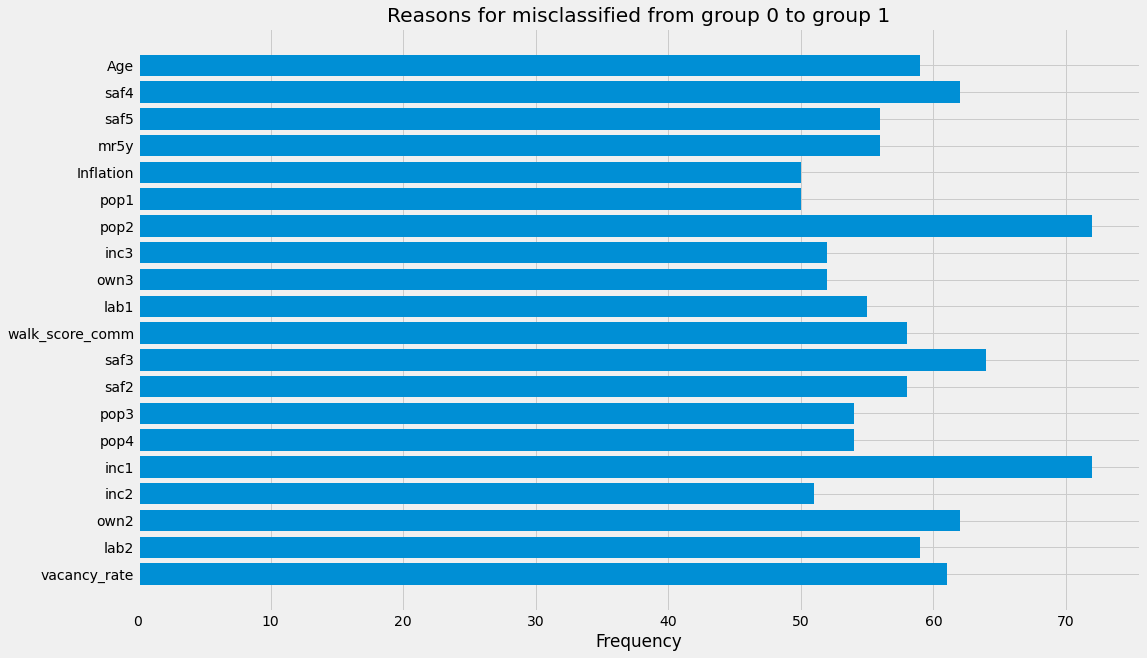

In [19]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

# Example data
people = ('Age','saf4','saf5','mr5y','Inflation','pop1','pop2','inc3','own3','lab1','walk_score_comm','saf3','saf2','pop3','pop4','inc1','inc2','own2','lab2','vacancy_rate')
y_pos = np.arange(len(people))
performance = list(di1.values())


bars=ax.barh(y_pos, performance,align='center')
labels=ax.get_xticklabels()
#for bar in bars:
   # yval = bar.get_height()
    #ax.text(bar.get_x()+0.08, yval + .05, xval,fontsize=14)
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Frequency')
ax.set_title('Reasons for misclassified from group 0 to group 1')

Text(0.5, 1.0, 'Reasons for misclassified from group 2 to group 1')

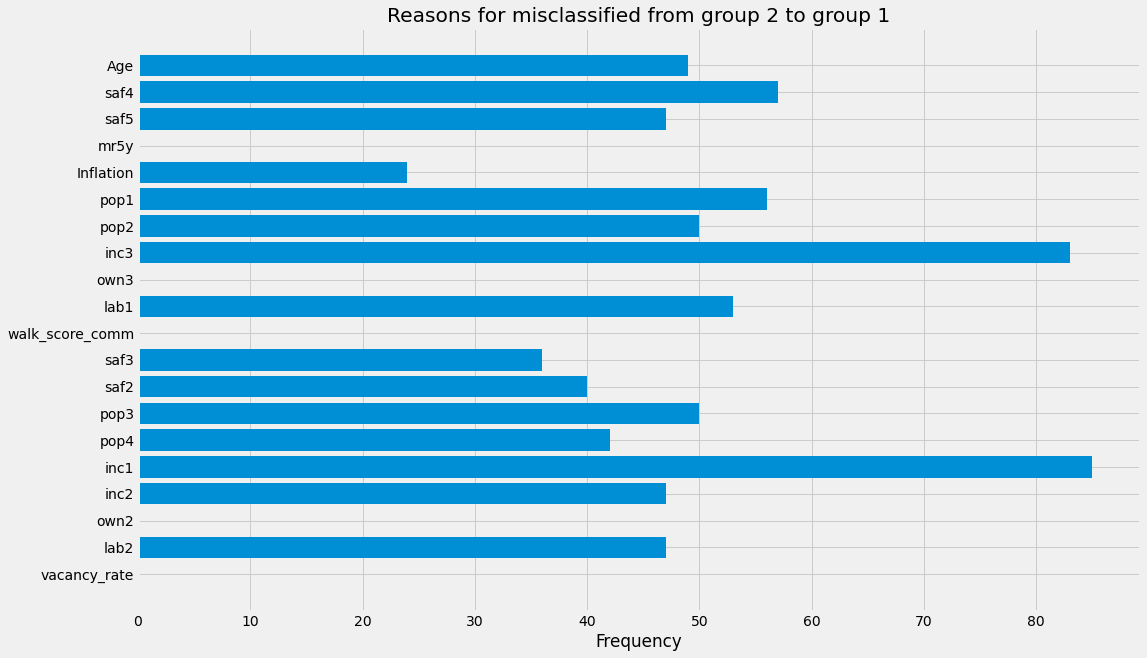

In [20]:
bars=ax.barh(y_pos, performance,align='center')
performance=di2.values()
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

# Example data
people = ('Age','saf4','saf5','mr5y','Inflation','pop1','pop2','inc3','own3','lab1','walk_score_comm','saf3','saf2','pop3','pop4','inc1','inc2','own2','lab2','vacancy_rate')
y_pos = np.arange(len(people))



bars=ax.barh(y_pos, performance,align='center')
labels=ax.get_xticklabels()
#for bar in bars:
   # yval = bar.get_height()
    #ax.text(bar.get_x()+0.08, yval + .05, xval,fontsize=14)
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Frequency')
ax.set_title('Reasons for misclassified from group 2 to group 1')

Text(0, 0.5, 'Reasons')

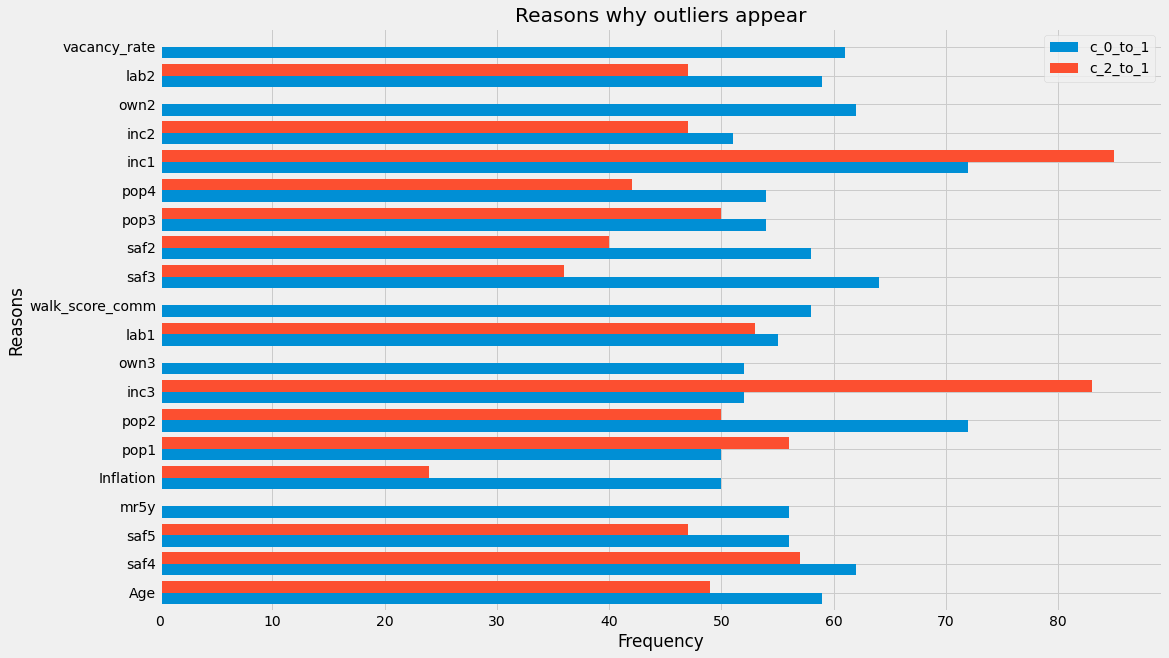

In [28]:
plotdata = pd.DataFrame({
    "c_0_to_1":list(di1.values()),
    "c_2_to_1":list(di2.values()),
    }, 
    index=list(people)
)
plotdata.plot(kind="barh",width=0.8)
plt.title("Reasons why outliers appear")
plt.xlabel("Frequency")
plt.ylabel("Reasons")